# Desafio Módulo 1 - Bootcamp Alura Data Science Aplicada 2

## Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

### Pelos dados mais recentes (24/05) o Brasil já ultrapassou 16 milhões de casos de COVID-19, o que resultou na morte de mais de 450 mil pessoas, uma triste marca para nosso país.
### No momento atual enfrentamos a onda da doença que infelizmente tem se mostrado ainda pior que a primeira, pois a cada dia que passa o recorde de casos diários tem sido ultrapassado.

## Objetivos

### Buscar entender o comportamento da doença ao longo do ano de 2020 e para o ano de 2021.
### Como está a situação do país neste momento em que vivemos uma segunda onda da Covid-19.

## Análises
- Número de casos;
- Número de mortes;
- Evolução de novos casos;
- Média móvel de mortes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import seaborn as sns
import warnings
import datetime
from datetime import datetime, date

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format


# Definindo funções


In [3]:
def checa_na(data):

    # checando a quantidade de valores nulos
    null_sum = data.isnull().sum() #Criando as colunas
    total = null_sum.sort_values(ascending=False) #Número total
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # Criando colunas de valores totais e valores missing
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # Removendo linhas que não possuem valores faltantes
    #df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [4]:
def coluna_estados(data):
    estados = {
    'RO' : '11',
    'AC' : '12',
    'AM' : '13',
    'RR' : '14',
    'PA' : '15',
    'AP' : '16',
    'TO' : '17',
    'MA' : '21',
    'PI' : '22',
    'CE' : '23',
    'RN' : '24',
    'PB' : '25',
    'PE' : '26',
    'AL' : '27',
    'SE' : '28',
    'BA' : '29',
    'MG' : '31',
    'ES' : '32',
    'RJ' : '33',
    'SP' : '35',
    'PR' : '41',
    'SC' : '42',
    'RS' : '43',
    'MS' : '50',
    'MT' : '51',
    'GO' : '52',
    'DF' : '53'}

    a = data['city_ibge_code'].astype(str).str[:2]

    regiao = a.replace(estados,regex=True)

    data.insert(value = regiao, column = 'Estado', loc = 0)

In [5]:
def coluna_regiao(data):
    a = data['city_ibge_code'].astype(str).str[0]
    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

In [6]:
def plot_semana(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['last_available_confirmed'], ascending=False)
    x = 'epidemiological_week'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['last_available_date'].max())
    x_label = 'Semana epidemiológica'
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    plt.vlines(
        x = 54, 
        ymin = 0, 
        ymax = data[y].max(),
        ls = '--', color ='black', alpha = 0.4)
    plt.text(53,data[y].max()/2,'2021',rotation=90, fontsize = 12,color ='black', alpha = 0.4)
    ax;

In [7]:
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

def plot_dia(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['date'])
    x = 'date'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['date'].max())
    x_label = ''
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)    
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    
    # axis
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.xaxis.set_minor_locator(YearLocator())
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%y'))
    
    # Legenda e label
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax;

In [8]:
def organiza_week(data):

    # Busca no dataframe os valores dos quatro primeiros caracteres e compara com o ano de 2020
    aux_2020 = data[data['epidemiological_week'].astype(str).str[:4]=='2020']

    # Para os casos de 2020, busca a semana epidemiologica, ou seja, valores dos ultimos dois caracteres da string.
    aux_2020['epidemiological_week'] = aux_2020['epidemiological_week'].astype(str).str[4:].astype('int64')

    # Buscando valores para o ano de 2021
    aux_2021 = data[data['epidemiological_week'].astype(str).str[:4]=='2021']
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'].astype(str).str[4:].astype('int64')

    # Para as semanas de 2021 será adicionado 53, para que o gráfico seja mostrado a continuidade das semanas.
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'] + 53

    aux_concat = aux_2020['epidemiological_week']
    aux_concat = aux_concat.append(aux_2021['epidemiological_week'])

    data = data.sort_values(by = 'epidemiological_week')
    data['epidemiological_week'] = aux_concat
    return data

# Importação dos dados

In [9]:
#df = pd.read_csv("./dados/caso_full.csv.gz",compression='gzip',sep = ',', error_bad_lines= False,encoding= 'utf-8', engine = 'python')

url = 'https://github.com/antoniodragoc/Bootcamp_Data_Science_Aplicada/blob/main/Modulo01/Projeto%20Modulo%2001/dados/caso_full.csv.gz?raw=true'
df = pd.read_csv(url,compression='gzip',sep = ',', error_bad_lines= False,encoding= 'utf-8', engine = 'python')

In [10]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [11]:
#df = df[df['city']!='Importados/Indefinidos']
df['state'].value_counts().shape[0]

27

In [12]:
coluna_regiao(df)

In [13]:
checa_na(df)

,Number of NA,Percent NA
last_available_confirmed_per_100k_inhabitants,23332,1.10
city,11830,0.56
city_ibge_code,7813,0.37
estimated_population,7813,0.37
estimated_population_2019,7813,0.37
last_available_death_rate,0,0.00
new_confirmed,0,0.00
state,0,0.00
place_type,0,0.00
order_for_place,0,0.00


# Pandemia de COVID-19 no Brasil

In [14]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# agrupando o dataset por região, estado e semana epidemiológica
df_regiao = df.query("place_type == 'state'").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})

df_regiao.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
df_regiao = df_regiao.groupby(by=['Região', 'epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})
df_regiao.reset_index(drop=False, inplace=True)
df_regiao.head()

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,202011,15,0,30192315.0
1,Centro Oeste,202012,169,0,30192315.0
2,Centro Oeste,202013,521,5,30192315.0
3,Centro Oeste,202014,1175,24,30192315.0
4,Centro Oeste,202015,2073,64,30192315.0


In [15]:
df_regiao = organiza_week(df_regiao)
df_regiao.iloc[[*range(3),*range(-3,0)]]

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
193,Sudeste,9,2,0,46289333.0
259,Sul,10,1,0,3055149.0
194,Sudeste,10,16,0,67719574.0
63,Centro Oeste,74,3072543,67904,30192315.0
258,Sudeste,74,6027460,206933,89012240.0
323,Sul,74,1670166,42320,16504303.0


In [16]:
# agrupando o dataset por região e semana epidemiológica
df_br = df_regiao.groupby(by=['epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})
df_br.reset_index(drop=False, inplace=True)
df_br['Região'] = 'Brasil'
#df_br = organiza_week(df_br)
df_br.iloc[[*range(3),*range(-3,0)]]

,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population,Região
0,9,2,0,46289333.0,Brasil
1,10,19,0,85705357.0,Brasil
2,11,136,0,174181414.0,Brasil
63,72,15599145,435039,211755692.0,Brasil
64,73,16055289,448499,211755692.0,Brasil
65,74,16126791,450165,211755692.0,Brasil


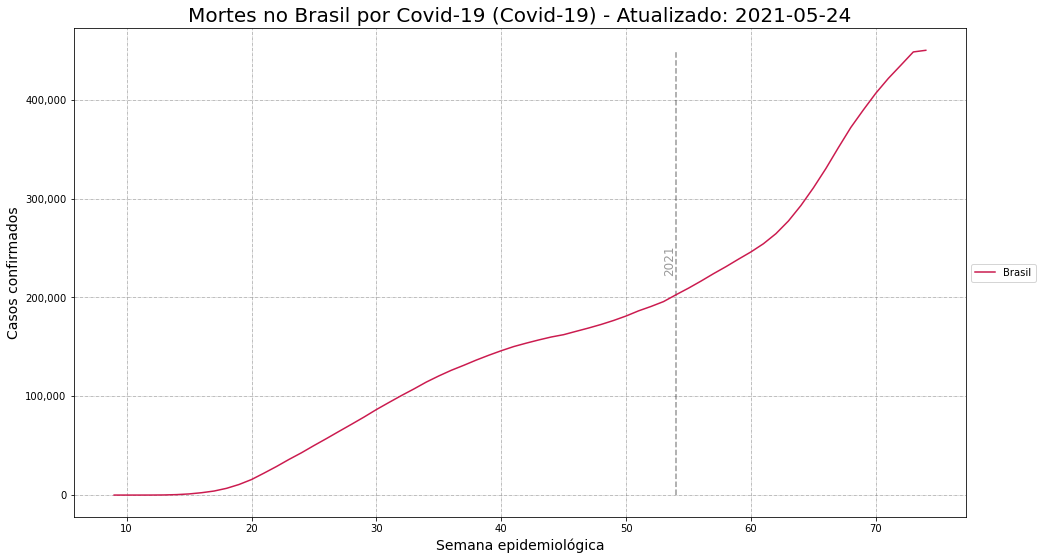

In [17]:
plot_semana(df_br, 'last_available_deaths', 'Região','Mortes no Brasil por Covid-19')

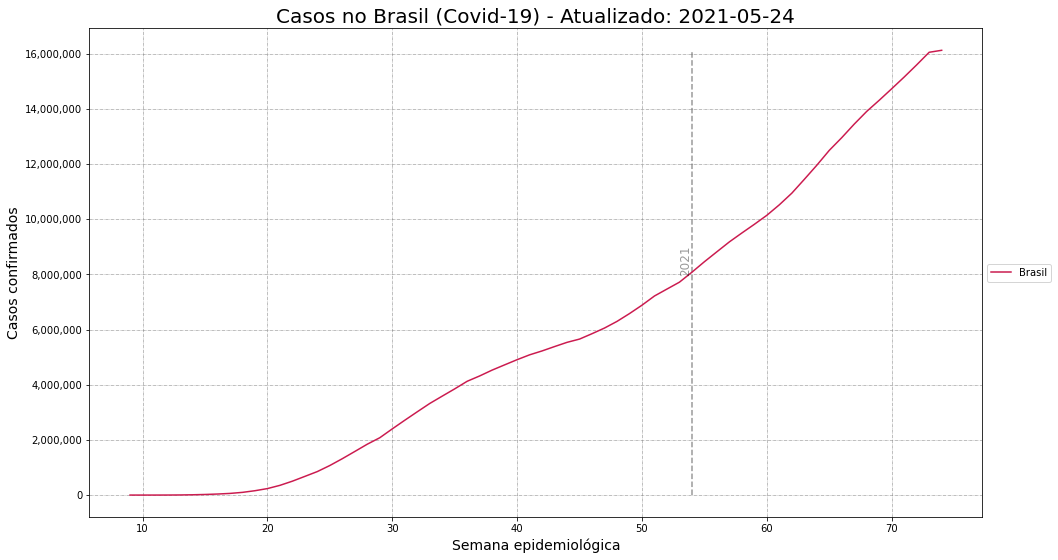

In [18]:
plot_semana(df_br, 'last_available_confirmed', 'Região','Casos no Brasil')

Os gráficos do Brasil apresentam um comportamento crescente até o momento, o que não é um bom sinal quando analisamos o avanço da doença no país.

Podemos observar que a inclinação da reta de mortes apresentou um comportamento acentuado desde a semana 40 e desde de então o número de óbitos não para de subir.

In [19]:
df_regiao_dia = df.query("place_type == 'state'").groupby(by=['Região','date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max','new_confirmed':'sum','new_deaths':'sum'})

df_regiao_dia.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
df_regiao_dia = df_regiao_dia.groupby(by=['Região', 'date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum','new_confirmed':'sum','new_deaths':'sum'})
df_regiao_dia.reset_index(drop=False, inplace=True)


# agrupando o dataset por região e semana epidemiológica
df_brd = df_regiao_dia.groupby(by=['date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum','new_confirmed':'sum','new_deaths':'sum'})
df_brd.reset_index(drop=False, inplace=True)
df_brd['Região'] = 'Brasil'
df_brd = organiza_week(df_brd)

df_brd['media_movel'] = df_brd['new_deaths'].rolling(7).mean()
#df_brd.iloc[[*range(3),*range(-3,0)]]

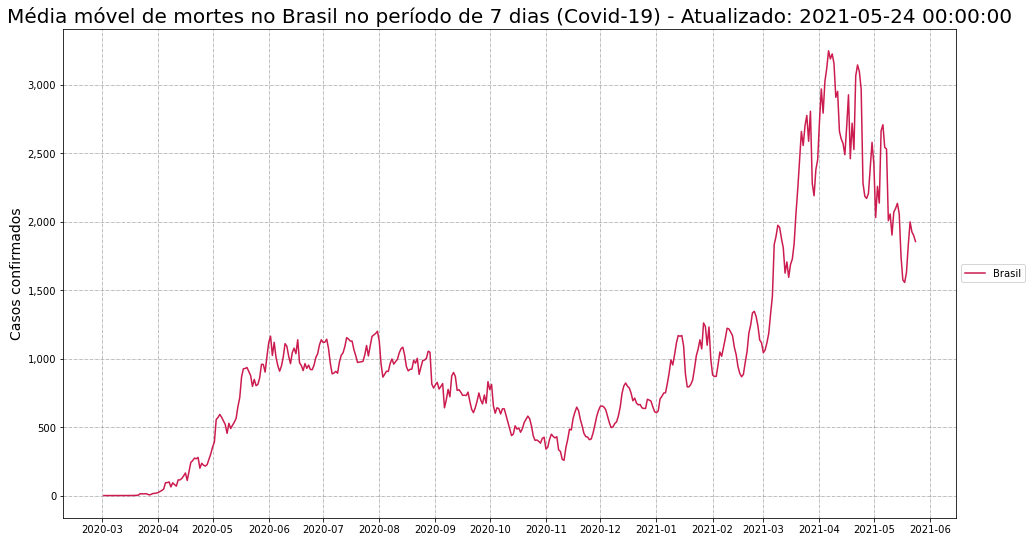

In [20]:
plot_dia(df_brd, 'media_movel', 'Região','Média móvel de mortes no Brasil no período de 7 dias')

In [21]:
df_brd[df_brd['media_movel'] == df_brd['media_movel'].max()]

,date,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,Região,media_movel
406,2021-04-06,67,5170960,139866,88541092.0,85132,4068,Brasil,3246.571429


Observamos que a média móvel de mortes no ano de 2021 está sendo pior que o ano de 2020. 

No pior momento da pandemia, em de Abril deste ano, a média móvel chegou a bater 3246 no dia 04/06/2021, dia em que o Brasil teve 4068 mortes por COVID-19.

# Análise por Estados no momento atual

In [22]:
# agrupando o dataset por estado
df_estados = df.query("place_type == 'state' ").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max','new_confirmed' : 'sum', 'new_deaths' : 'max','date':'max'})
df_estados.reset_index(drop=False, inplace=True)
df_estados = organiza_week(df_estados)
df_estados.head()

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,date
1402,Sudeste,SP,9,5,2,0,46289333.0,2,0,2020-02-29
1468,Sul,DF,10,1,1,0,3055149.0,1,0,2020-03-07
1337,Sudeste,RJ,10,3,2,0,17366189.0,2,0,2020-03-07
1208,Sudeste,ES,10,3,1,0,4064052.0,1,0,2020-03-07
256,Nordeste,BA,10,2,2,0,14930634.0,2,0,2020-03-07


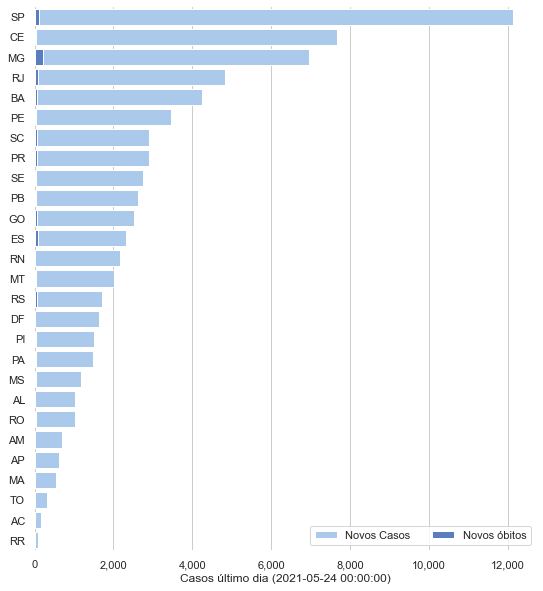

In [23]:
# https://seaborn.pydata.org/examples/part_whole_bars.html?highlight=bar
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 10))

# Plot dos novos casos confirmados no dia mais recente
sns.set_color_codes("pastel")
sns.barplot(
    x="new_confirmed", 
    y="state", 
    data=df_estados[df_estados['date']==df_estados['date'].max()].sort_values('new_confirmed', ascending = False),
    label="Novos Casos", 
    color="b")

# Plot dos novos óbitos confirmados no dia mais recente
sns.set_color_codes("muted")
sns.barplot(
    x="new_deaths",
    y="state", 
    data=df_estados[df_estados['date']==df_estados['date'].max()].sort_values('new_confirmed', ascending = False),
    label="Novos óbitos", 
    color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    ylabel="",
    xlabel="Casos último dia ({})".format(df_estados['date'].max()))       
       
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)


Ocupando a primeira posição temos o estado de São Paulo, que por apresentar a maior população do país, 44 milhões de pessoas, também lidera o número de casos.

Em segundo lugar temos o estado do Ceará, com apenas 8,84 milhões de pessoas, apresentou um grande número de casos diários da doença, o que gera um sinal de alerta, pois temos um grande número de infectados em um estado que não possui um número muito elevado de pessoas.

# Análise por Região

In [24]:
df_regiao.head()

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
193,Sudeste,9,2,0,46289333.0
259,Sul,10,1,0,3055149.0
194,Sudeste,10,16,0,67719574.0
64,Nordeste,10,2,0,14930634.0
195,Sudeste,11,88,0,89012240.0


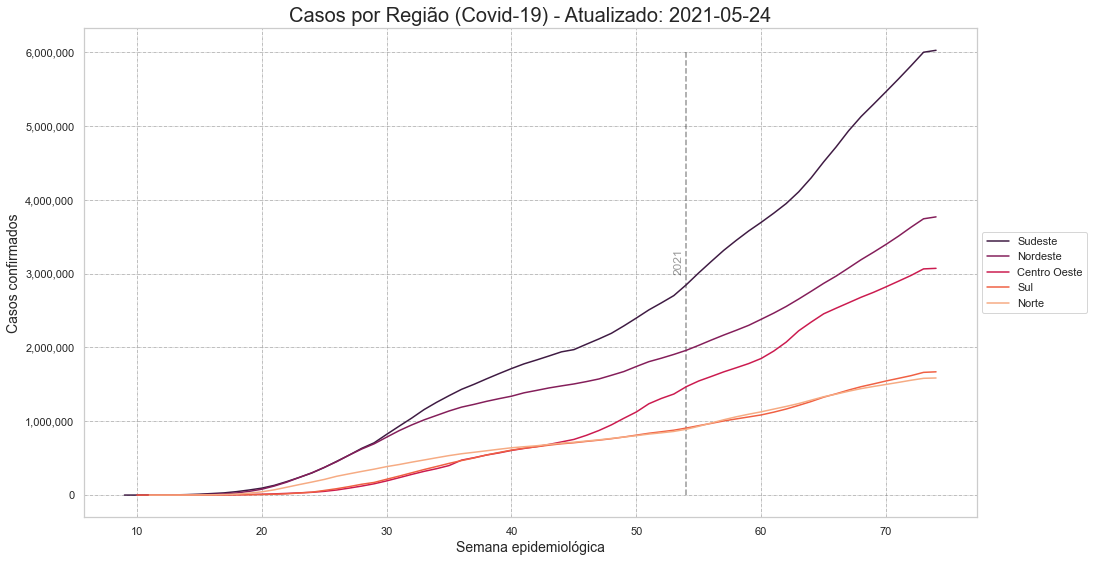

In [25]:
plot_semana(df_regiao, 'last_available_confirmed', 'Região','Casos por Região')

Podemos notar que a partir da semana 40 a região Centro Oeste teve seu quadro bastante agravado se aproximandoda região Nordeste e se distanciando das regiões Sul e Norte. Mostrando um crescimento considerável de casos, pois até a semana 30 apresentou valores menores que as demais regiões.

Também percebe-se que a região Sudeste teve uma piora bastante expressiva, pois a distância entre as demais regiões aumentou a partir da semana 50 e teve uma evolução ainda maior após a semana 60.


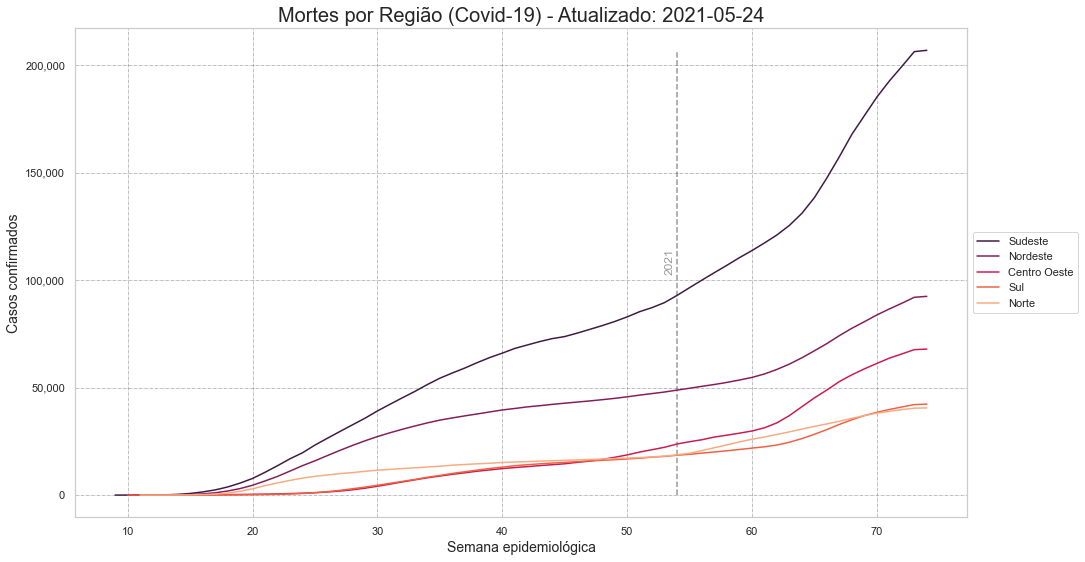

In [26]:
plot_semana(df_regiao, 'last_available_deaths', 'Região','Mortes por Região')


Assim como observado anteriormente a região Centro-Oeste demonstrou uma evolução no número de mortos após a semana 40 e um crescimento ainda maior após a semana 60.

A região Sudeste por sua vez, apresentou uma inclinação na curva muito acentuada após a 60, que coincide com o pior momento na pandemia, onde tivemos uma média móvel de mortes acima de 4 mil ao dia.

# Análise para a Região Sudeste

In [27]:
df_sudeste = df_estados[df_estados['Região'] == 'Sudeste']
df_sudeste.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,date
1402,Sudeste,SP,9,5,2,0,46289333.0,2,0,2020-02-29
1337,Sudeste,RJ,10,3,2,0,17366189.0,2,0,2020-03-07
1208,Sudeste,ES,10,3,1,0,4064052.0,1,0,2020-03-07
1467,Sudeste,SP,74,455,3192727,107677,46289333.0,12132,117,2021-05-24
1272,Sudeste,ES,74,446,471566,10589,4064052.0,2318,77,2021-05-24
1401,Sudeste,RJ,74,446,844442,49539,17366189.0,4819,77,2021-05-24


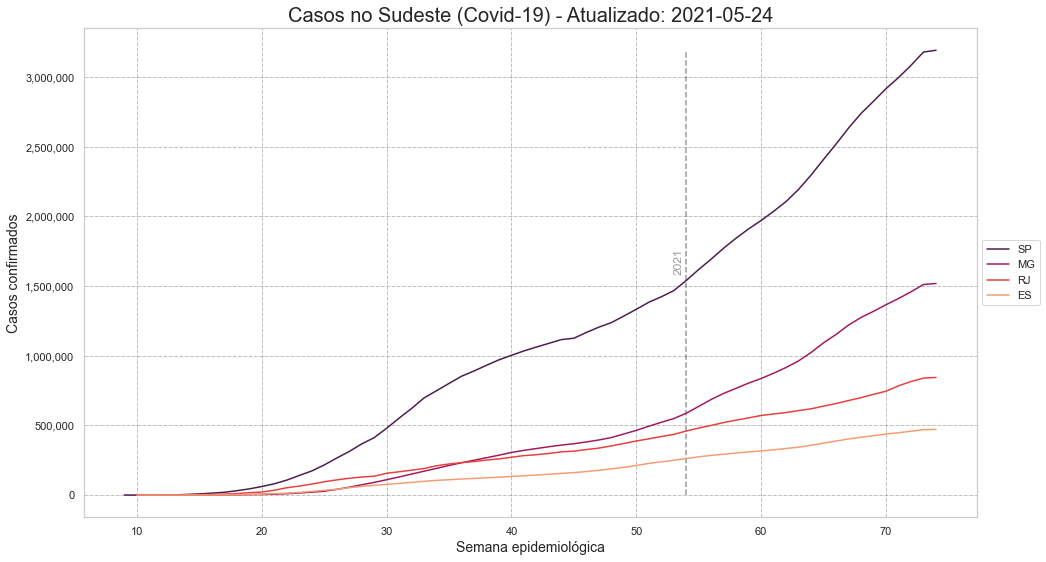

In [28]:
plot_semana(df_sudeste, 'last_available_confirmed', 'state','Casos no Sudeste')

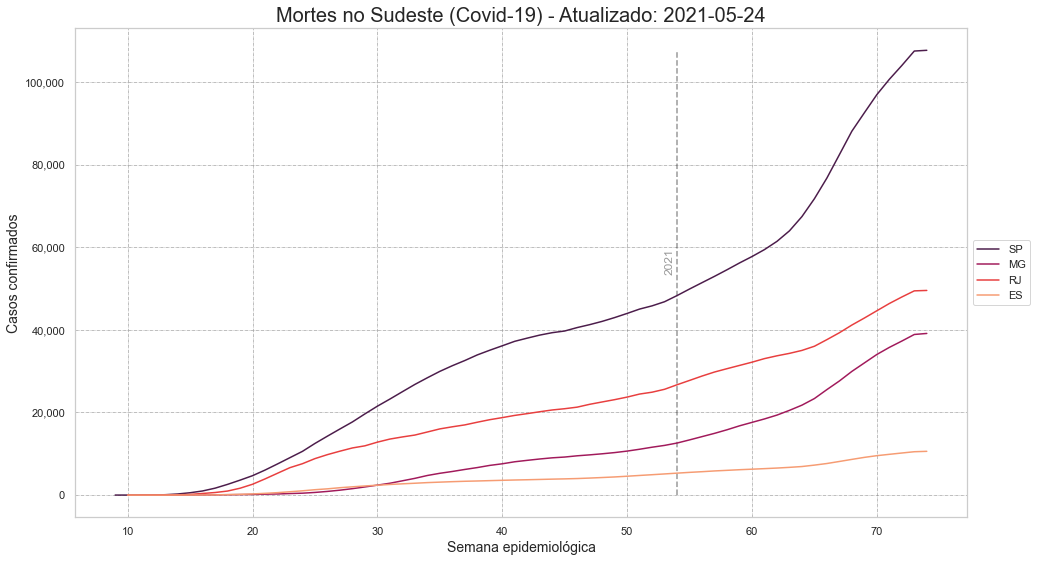

In [29]:
plot_semana(df_sudeste, 'last_available_deaths', 'state','Mortes no Sudeste')


De fato, pelo elevado número de pessoas, o estado de São Paulo representa grande parte do volume de infectados e também de óbitos quando analisamos a região Sudeste.

Desta vez o destaque é o estado do Rio de Janeiro que a pesar de possuir menos cidadãos que Minas Gerais, 16,5milhões para o Rio e 20,9 Milhões para Minas, apresentou números consideravelmente maiores de óbitos que o estado de Minas Gerais, mesmo tendo um menor número de casos.

# 5 Estados com maiores números de Casos de COVID-19

In [30]:
top5 = df_estados[df_estados['epidemiological_week'] == df_estados['epidemiological_week'].max()].sort_values(by = 'last_available_confirmed',ascending= False).head(5)
top5_estados = top5['state'].to_list()

In [31]:
# agrupando o dataset por região, estado e semana epidemiológica
df_top5 = df_estados.query("state == @top5_estados").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})
df_top5.reset_index(drop=False, inplace=True)
#df_top5 = organiza_week(df_top5)
df_top5.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,PR,11,3,6,0,11516840.0
1,Centro Oeste,PR,12,10,43,0,11516840.0
2,Centro Oeste,PR,13,17,137,2,11516840.0
320,Sudeste,SP,72,446,3085290,103995,46289333.0
321,Sudeste,SP,73,453,3180595,107497,46289333.0
322,Sudeste,SP,74,455,3192727,107677,46289333.0


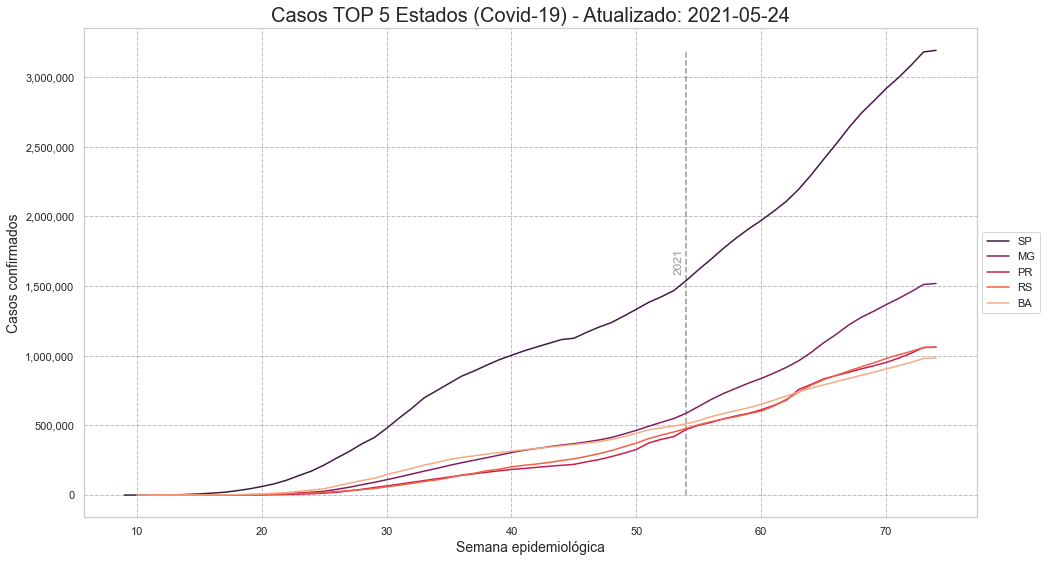

In [32]:
plot_semana(df_top5, 'last_available_confirmed', 'state','Casos TOP 5 Estados')

# 5 Estados com maiores números de mortes excluindo São Paulo

In [33]:
top5 = df_estados[df_estados['epidemiological_week'] == df_estados['epidemiological_week'].max()].sort_values(by = 'last_available_deaths',ascending= False)[1:6]
top5_estados = top5['state'].to_list()

In [34]:
# agrupando o dataset por região, estado e semana epidemiológica
df_top5ssp = df_estados.query("state == @top5_estados").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})
df_top5ssp.reset_index(drop=False, inplace=True)
#df_top5 = organiza_week(df_top5)
df_top5ssp.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,PR,11,3,6,0,11516840.0
1,Centro Oeste,PR,12,10,43,0,11516840.0
2,Centro Oeste,PR,13,17,137,2,11516840.0
319,Sudeste,RJ,72,437,815187,47951,17366189.0
320,Sudeste,RJ,73,444,839623,49438,17366189.0
321,Sudeste,RJ,74,446,844442,49539,17366189.0


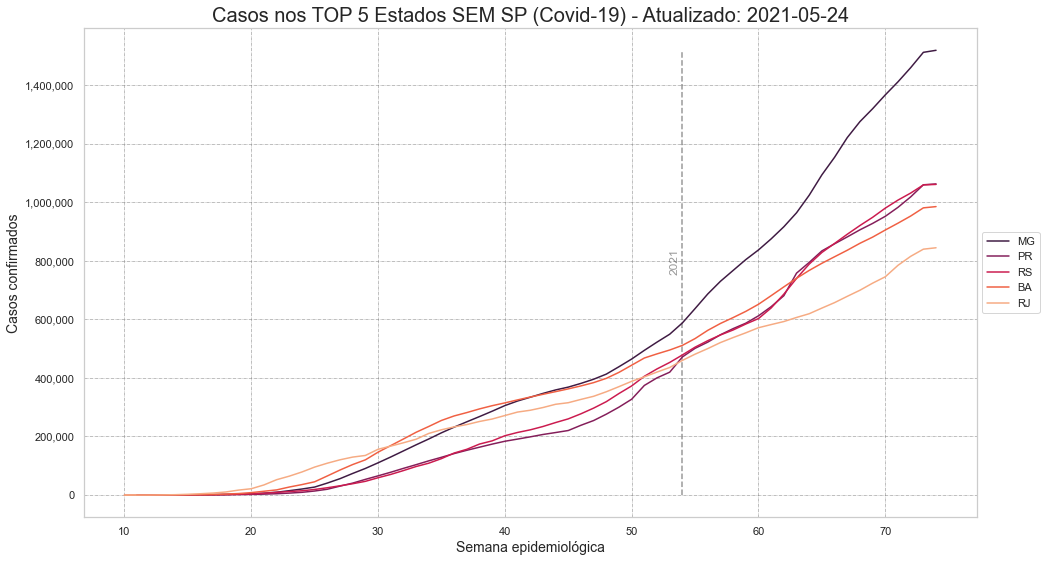

In [35]:
plot_semana(df_top5ssp, 'last_available_confirmed', 'state','Casos nos TOP 5 Estados SEM SP')

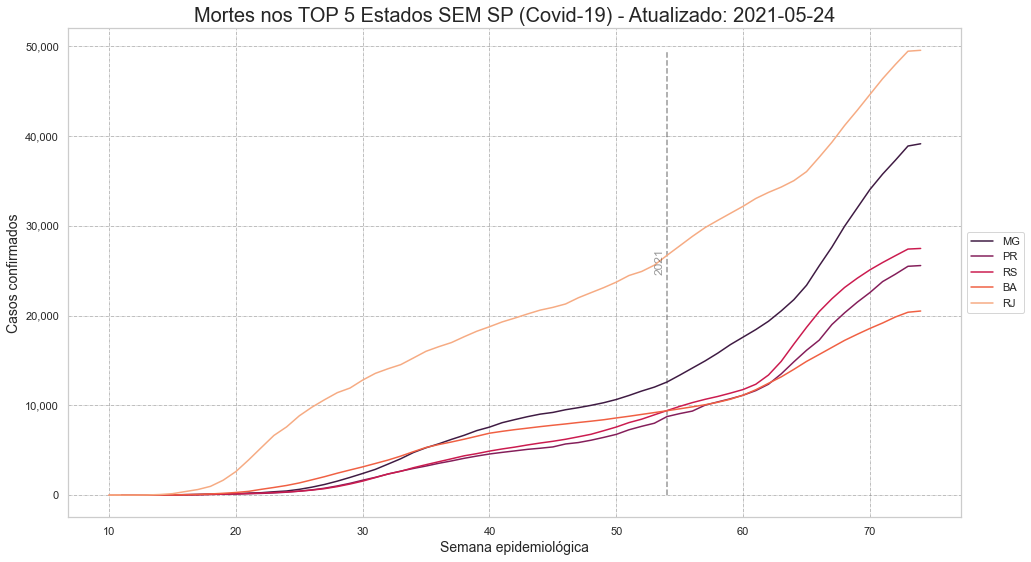

In [36]:
plot_semana(df_top5ssp, 'last_available_deaths', 'state','Mortes nos TOP 5 Estados SEM SP')

Assim como observado anteriormente, o Rio de Janeiro tem se destacado de forma negativa, pois mesmo apresentando o menor número de casos mostrou um grande número de mortes, demosntrando uma distância considerável quando comparado com os demais estados.

O destaque positivo foi o estado da Bahia que começou a pandemia com a segunda posição na quantidade de mortes e atualmente ocupa a quarta posição.